# Imports

In [28]:
## imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

# company_index='5'
# company_name='Amazon'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'\
#             +f'{company_index}_{company_name}'
# img_path = root + '/Desktop/Paper/img'
# img_flag = False

# if not os.path.exists(img_path):
#     os.makedirs(img_path)

# Data Load

In [29]:
pc_flag = 'pro'

sentences = pd.\
read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all_px4.csv')

# sentences = pd.\
# read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all.csv')


sentences.shape

(344573, 15)

In [30]:
# display(sentences)
sents = df.Px_Texts.values
print(len(sents))
count = 0
for sent in sents[:5]:
    if (len(sent.split()) <= 0) :
        count += 1
print(count)
        
    


344573
0


# Tokenization

In [32]:
df = sentences.copy()

data_px = [sents.split() for sents in df.Px_Texts.values]
print(len(data_px))
# data_px = df['Px_Texts'].str.split().values
# data_px


344573


# Build Dictionary

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_px) ##dictionary
print(len(id2word))
print(id2word)

# Create Corpus
texts = data_px 

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  ##corpus

# View
print(corpus[:5])

17507
Dictionary(17507 unique tokens: ['close', 'hous', 'benefit', 'decent', 'employe']...)
[[(0, 1), (1, 1)], [(2, 1)], [(3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


# LDA

In [35]:
def lda_viz(num_topics): 

    # %%time
    # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    num_topics = num_topics
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
    # %time ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)


    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_px, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


    ##mallet model to lda model conversion
    optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

    # %%time
    # Visualize the topics
    pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='tsne')
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
    return vis
    # pyLDAvis.show(vis)

In [50]:
viz = lda_viz(10)
viz


Coherence Score:  0.3628195206247931


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.096415 -0.225534       1        1  10.283468
6      0.168890 -0.275752       2        1  10.220873
2      0.187200 -0.084554       3        1   9.987384
7     -0.329908 -0.076298       4        1   9.982250
8      0.066191  0.189166       5        1   9.952342
1      0.088897  0.150196       6        1   9.922859
5      0.002576  0.209790       7        1   9.922639
0     -0.090712  0.133331       8        1   9.912885
3      0.145355  0.078793       9        1   9.911664
4     -0.334903 -0.099139      10        1   9.903635, topic_info=     Category          Freq                Term         Total  loglift  \
28    Default  37475.000000                 pay  37475.000000  30.0000   
2     Default  56661.000000             benefit  56661.000000  29.0000   
25    Default  23363.000000                hour  23363.000000  28.0000   
13    Default  26351.000000               lunch  26351.000000  27.0000   
43    Default  21327.000000               peopl  21327.000000  26.0000   
10    Default  16660.000000               break  16660.000000  25.0000   
5     Default  21348.000000                free  21348.000000  24.0000   
101   Default  21306.000000            discount  21306.000000  23.0000   
45    Default  12722.000000             flexibl  12722.000000  22.0000   
41    Default  12203.000000             environ  12203.000000  21.0000   
9     Default  11574.000000                time  11574.000000  20.0000   
4     Default  10879.000000             employe  10879.000000  19.0000   
106   Default  10009.000000             schedul  10009.000000  18.0000   
16    Default   9365.000000              custom   9365.000000  17.0000   
161   Default  11894.000000               manag  11894.000000  16.0000   
103   Default  11635.000000              cowork  11635.000000  15.0000   
214   Default   8537.000000          free_lunch   8537.000000  14.0000   
40    Default   7995.000000          hour_lunch   7995.000000  13.0000   
59    Default   7728.000000            friendli   7728.000000  12.0000   
84    Default   7505.000000                paid   7505.000000  11.0000   
90    Default   7394.000000               learn   7394.000000  10.0000   
251   Default   7327.000000                team   7327.000000   9.0000   
118   Default   7116.000000                nice   7116.000000   8.0000   
82    Default   6859.000000            opportun   6859.000000   7.0000   
142   Default   6681.000000              advanc   6681.000000   6.0000   
99    Default   7579.000000                 fun   7579.000000   5.0000   
98    Default   6304.000000         pay_benefit   6304.000000   4.0000   
24    Default   6355.000000                 day   6355.000000   3.0000   
52    Default   5487.000000                food   5487.000000   2.0000   
483   Default   5291.000000                home   5291.000000   1.0000   
...       ...           ...                 ...           ...      ...   
94    Topic10   2405.988134          decent_pay   2405.988134   2.3123   
653   Topic10   1598.985872       excel_benefit   1598.985872   2.3123   
169   Topic10   1325.646396              packag   1325.646396   2.3123   
272   Topic10    852.058220      benefit_packag    852.058220   2.3123   
228   Topic10    607.754805      decent_benefit    607.754805   2.3123   
1950  Topic10    645.802059     compens_benefit    647.849983   2.3091   
2259  Topic10    457.568280           excel_pay    457.568280   2.3123   
607   Topic10    430.534706          pay_decent    430.534706   2.3123   
708   Topic10    324.402895              averag    324.402895   2.3123   
312   Topic10    291.361859      benefit_decent    291.361859   2.3123   
1465  Topic10    262.325797              listen    262.325797   2.3123   
885   Topic10    328.407869       benefit_manag    329.382337   2.3093   
1570  Topic10    236.293466               music    23

# Finding Optimal Model

In [36]:
#parameter tuning (finding the best model)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, 
                                                  random_seed=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
#  Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_px, start=8, limit=30, step=2)

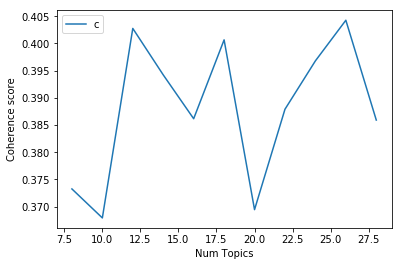

In [53]:
# Show graph
limit=30; start=8; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 8  has Coherence Value of 0.3733
Num Topics = 10  has Coherence Value of 0.3679
Num Topics = 12  has Coherence Value of 0.4028
Num Topics = 14  has Coherence Value of 0.3942
Num Topics = 16  has Coherence Value of 0.3862
Num Topics = 18  has Coherence Value of 0.4007
Num Topics = 20  has Coherence Value of 0.3694
Num Topics = 22  has Coherence Value of 0.3879
Num Topics = 24  has Coherence Value of 0.3968
Num Topics = 26  has Coherence Value of 0.4043
Num Topics = 28  has Coherence Value of 0.3859


# Optimal Model Visualization

In [55]:
vis = lda_viz(12)
vis


Coherence Score:  0.4083414436963457


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.172869 -0.313808       1        1  8.610075
5      0.134625 -0.245738       2        1  8.478690
0     -0.220125 -0.007025       3        1  8.377087
4     -0.267239 -0.019745       4        1  8.349941
8      0.103639  0.055812       5        1  8.295357
3      0.132608  0.148133       6        1  8.286010
9      0.121116  0.198573       7        1  8.284019
6     -0.266532  0.006329       8        1  8.279624
1      0.122278  0.148428       9        1  8.276193
2      0.088965 -0.144427      10        1  8.267436
11    -0.253804 -0.011901      11        1  8.265889
10     0.131600  0.185369      12        1  8.229681, topic_info=     Category          Freq            Term         Total  loglift  logprob
28    Default  37330.000000             pay  37330.000000  30.0000  30.0000
2     Default  57294.000000         benefit  57294.000000  29.0000  29.0000
43    Default  21331.000000           peopl  21331.000000  28.0000  28.0000
101   Default  21212.000000        discount  21212.000000  27.0000  27.0000
5     Default  20768.000000            free  20768.000000  26.0000  26.0000
13    Default  26345.000000           lunch  26345.000000  25.0000  25.0000
25    Default  23837.000000            hour  23837.000000  24.0000  24.0000
10    Default  16631.000000           break  16631.000000  23.0000  23.0000
45    Default  12612.000000         flexibl  12612.000000  22.0000  22.0000
9     Default  12101.000000            time  12101.000000  21.0000  21.0000
41    Default  12023.000000         environ  12023.000000  20.0000  20.0000
161   Default  11861.000000           manag  11861.000000  19.0000  19.0000
4     Default  10962.000000         employe  10962.000000  18.0000  18.0000
106   Default   9923.000000         schedul   9923.000000  17.0000  17.0000
16    Default   9292.000000          custom   9292.000000  16.0000  16.0000
103   Default  11446.000000          cowork  11446.000000  15.0000  15.0000
214   Default   8428.000000      free_lunch   8428.000000  14.0000  14.0000
40    Default   7981.000000      hour_lunch   7981.000000  13.0000  13.0000
84    Default   7848.000000            paid   7848.000000  12.0000  12.0000
59    Default   7614.000000        friendli   7614.000000  11.0000  11.0000
90    Default   7466.000000           learn   7466.000000  10.0000  10.0000
99    Default   7372.000000             fun   7372.000000   9.0000   9.0000
118   Default   7064.000000            nice   7064.000000   8.0000   8.0000
82    Default   6887.000000        opportun   6887.000000   7.0000   7.0000
142   Default   6708.000000          advanc   6708.000000   6.0000   6.0000
98    Default   6280.000000     pay_benefit   6280.000000   5.0000   5.0000
251   Default   7300.000000            team   7300.000000   4.0000   4.0000
483   Default   5433.000000            home   5433.000000   3.0000   3.0000
11    Default   5347.000000          health   5347.000000   2.0000   2.0000
135   Default   5225.000000           train   5225.000000   1.0000   1.0000
...       ...           ...             ...           ...      ...      ...
444   Topic12    989.146731            alot    989.146731   2.4974  -4.5129
34    Topic12    864.201881          depart    864.201881   2.4974  -4.6480
87    Topic12    839.212911        everyday    839.212911   2.4974  -4.6773
233   Topic12    795.482213           short    796.502315   2.4961  -4.7308
587   Topic12    684.073055  friendli_peopl    684.073055   2.4974  -4.8817
597   Topic12    652.836842      help_peopl    652.836842   2.4974  -4.9285
325   Topic12    616.394594             met    616.394594   2.4974  -4.9859
441   Topic12    821.512390            leav    824.552135   2.4937  -4.6986
842   Topic12    542.468891             job    542.468891   2.4974  -5.1137
1052  Topic12    504.985436   benefit_peopl    504.985436   2.4974  -5.1853
387   Topic12    486.24

In [56]:
vis = lda_viz(26)
vis


Coherence Score:  0.37988354408079655


/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.129088 -0.301673       1        1  4.061888
0     -0.065445  0.050558       2        1  3.967950
16    -0.136105 -0.279961       3        1  3.907562
6     -0.140085 -0.329457       4        1  3.899615
20    -0.095750 -0.096567       5        1  3.891754
3     -0.084132  0.144798       6        1  3.869052
8     -0.084668 -0.092491       7        1  3.865254
17    -0.075086  0.105321       8        1  3.849540
21    -0.077559  0.105906       9        1  3.848897
13    -0.035068  0.074843      10        1  3.843747
5     -0.076649  0.098984      11        1  3.836836
2     -0.071697  0.142858      12        1  3.829271
4     -0.070976  0.085040      13        1  3.828860
18     0.031550  0.037081      14        1  3.826098
12    -0.064141  0.061317      15        1  3.823591
7     -0.078487  0.058001      16        1  3.819009
14     0.122207  0.028434      17        1  3.818582
15    -0.051604  0.058748      18        1  3.818458
19    -0.078366  0.098849      19        1  3.818003
9      0.364276 -0.043384      20        1  3.817530
11     0.296435 -0.020022      21        1  3.815091
25    -0.031611 -0.082074      22        1  3.814542
24    -0.081268  0.107256      23        1  3.801127
23     0.400475 -0.044954      24        1  3.791227
22    -0.070259  0.075382      25        1  3.790127
10     0.383100 -0.042792      26        1  3.746388, topic_info=      Category          Freq             Term         Total  loglift  logprob
2      Default  58173.000000          benefit  58173.000000  30.0000  30.0000
28     Default  38699.000000              pay  38699.000000  29.0000  29.0000
13     Default  26149.000000            lunch  26149.000000  28.0000  28.0000
25     Default  23425.000000             hour  23425.000000  27.0000  27.0000
43     Default  21247.000000            peopl  21247.000000  26.0000  26.0000
101    Default  20615.000000         discount  20615.000000  25.0000  25.0000
5      Default  21184.000000             free  21184.000000  24.0000  24.0000
10     Default  16048.000000            break  16048.000000  23.0000  23.0000
45     Default  11952.000000          flexibl  11952.000000  22.0000  22.0000
161    Default  11674.000000            manag  11674.000000  21.0000  21.0000
103    Default  11399.000000           cowork  11399.000000  20.0000  20.0000
9      Default  11374.000000             time  11374.000000  19.0000  19.0000
41     Default  12060.000000          environ  12060.000000  18.0000  18.0000
106    Default   9403.000000          schedul   9403.000000  17.0000  17.0000
4      Default  10465.000000          employe  10465.000000  16.0000  16.0000
214    Default   8362.000000       free_lunch   8362.000000  15.0000  15.0000
16     Default   9290.000000           custom   9290.000000  14.0000  14.0000
59     Default   7616.000000         friendli   7616.000000  13.0000  13.0000
99     Default   7416.000000              fun   7416.000000  12.0000  12.0000
84     Default   7376.000000             paid   7376.000000  11.0000  11.0000
90     Default   7262.000000            learn   7262.000000  10.0000  10.0000
118    Default   7222.000000             nice   7222.000000   9.0000   9.0000
251    Default   7200.000000             team   7200.000000   8.0000   8.0000
82     Default   6976.000000         opportun   6976.000000   7.0000   7.0000
24     Default   6868.000000              day   6868.000000   6.0000   6.0000
142    Default   6795.000000           advanc   6795.000000   5.0000   5.0000
40     Default   7924.000000       hour_lunch   7924.000000   4.0000   4.0000
483    Default   5478.000000             home   5478.000000   3.0000   3.0000
52     Default   5443.000000             food   5443.000000   2.0000   2.0000
11     Default   5405.000000           health   5405.000000   1.0000   1.0000
...        ...           ...              ...          

## Topic Composition

In [37]:
num_topics = 12

mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)

optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [61]:
# Print the topics
model_topics = optimal_model.show_topics(formatted=True, num_topics=num_topics)
# pprint(optimal_model.print_topics(num_words=10))
pprint(model_topics)

[(0,
  '0.132*"time" + 0.113*"benefit" + 0.085*"paid" + 0.048*"vacat" + '
  '0.044*"compens" + 0.028*"overtim" + 0.023*"holiday" + 0.022*"pto" + '
  '0.018*"paid_time" + 0.016*"competit"'),
 (1,
  '0.133*"environ" + 0.084*"friendli" + 0.081*"fun" + 0.037*"fast" + '
  '0.035*"atmospher" + 0.033*"pace" + 0.031*"cowork" + 0.028*"staff" + '
  '0.026*"fast_pace" + 0.025*"cultur"'),
 (2,
  '0.139*"flexibl" + 0.110*"schedul" + 0.076*"hour" + 0.060*"home" + '
  '0.047*"flexibl_schedul" + 0.040*"flexibl_hour" + 0.031*"easi" + '
  '0.027*"famili" + 0.021*"close" + 0.021*"locat"'),
 (3,
  '0.131*"manag" + 0.095*"cowork" + 0.078*"nice" + 0.066*"team" + '
  '0.048*"bonus" + 0.033*"bonu" + 0.028*"incent" + 0.020*"awesom" + '
  '0.019*"support" + 0.017*"reward"'),
 (4,
  '0.174*"benefit" + 0.058*"health" + 0.045*"insur" + 0.036*"balanc" + '
  '0.030*"care" + 0.029*"healthcar" + 0.026*"life" + 0.020*"health_benefit" + '
  '0.017*"life_balanc" + 0.016*"worklif"'),
 (5,
  '0.223*"free" + 0.091*"free_lun

In [ ]:
## Dominant Topic in each documents

def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_px):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_px)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts().sort_index()
# display(topic_counts)

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4).sort_index()
# display(topic_contribution)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().sort_values(by='Dominant_Topic').set_index('Dominant_Topic')
# display(topic_num_keywords)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
df_dominant_topic.head()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(int((optimal_model.num_topics+1)/2),2,figsize=(16,14), dpi=160)

for i, ax in enumerate(axes.flatten()):   
    print(i)
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins=100, color=cols[i%10])
    ax.tick_params(axis='y', labelcolor=cols[i%10], color=cols[i%10])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i%10])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i%10]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Bar Plot

In [ ]:
from collections import Counter

topics = optimal_model.show_topics(formatted=False)
data_flat = [w for w_list in data_px for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
display(df.head())
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(14,14))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i%8], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)  

img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/topics_kw/pros'
img_flag = True

if not os.path.exists(img_path):
    os.makedirs(img_path)
    
if img_flag:
    plt.savefig(img_path+'/1-50_pros_600iter_10topics.png')
    
plt.show()